In [1]:
import numpy as np

In [23]:
n = 3
N = n*n

R = np.random.random((n,2))
B = np.random.random((n,2))

D = np.empty((n,n))

for i in range(n):
    for j in range(n):
        D[i][j] = ( (R[i][0]-B[j][0])**2 + (R[i][1]-B[j][1])**2 )**(0.5)

print(D)
Q = {}
S = {}


[[0.11964989 0.76578497 0.35376068]
 [0.07785982 0.74413831 0.28626938]
 [0.58613269 0.59568907 0.40438193]]


In [24]:
lamba = 1
beta = 2
#alpha = beta*1
alpha = 1.5

print('Lamba: ' + str(lamba))
print('Alpha: ' + str(alpha))
print('Beta: ' + str(beta))

for i in range(N):
    #Q[(i,i)] = D[int(i/n)][i%n]*(alpha/2 - beta*lamba) - alpha
    #Q(i,i)] = D[int(i/n)][i%n]*(alpha/2) - alpha
    Q[(i,i)] = D[int(i/n)][i%n] - alpha

print('Q diagonal done.')

Lamba: 1
Alpha: 1.5
Beta: 2
Q diagonal done.


In [25]:
for i in range(N):
    for j in range(i+1,N):
        if int(i/n)==int(j/n) or i%n==j%n:
            S[(i,j)] = 1
            Q[(i,j)] = beta*lamba

In [26]:
from dimod.utilities import qubo_to_ising
from dimod import BinaryQuadraticModel

(h, J, ising_offset) = qubo_to_ising(Q)
bqm = BinaryQuadraticModel.from_qubo(Q)

In [27]:
print(ising_offset)
print(h)
print(J)

4.216833367344009
{0: 1.3098249471452013, 1: 1.6328924830782965, 2: 1.42688034007752, 3: 1.28892991043412, 4: 1.6220691543634471, 5: 1.3931346888728326, 6: 1.5430663438801222, 7: 1.5478445369019085, 8: 1.4521909625905607}
{(1, 2): 0.5, (0, 1): 0.5, (4, 7): 0.5, (6, 7): 0.5, (6, 8): 0.5, (4, 5): 0.5, (2, 8): 0.5, (1, 4): 0.5, (0, 2): 0.5, (0, 6): 0.5, (3, 6): 0.5, (1, 7): 0.5, (3, 4): 0.5, (2, 5): 0.5, (7, 8): 0.5, (0, 3): 0.5, (5, 8): 0.5, (3, 5): 0.5}


In [28]:
from dwave.system.samplers import DWaveSampler
from minorminer import find_embedding

sampler = DWaveSampler(config_file='/home/manoj/.config/dwave/dwave.conf',profile='prod')
A = sampler.edgelist
AD = sampler.adjacency
print(AD)

{0: set([128, 4, 5, 6, 7]), 1: set([129, 4, 5, 6, 7]), 2: set([130, 4, 5, 6, 7]), 3: set([131, 4, 5, 6, 7]), 4: set([0, 1, 2, 3, 12]), 5: set([0, 1, 2, 3, 13]), 6: set([0, 1, 2, 3, 14]), 7: set([0, 1, 2, 3, 15]), 8: set([136, 12, 13, 14, 15]), 9: set([137, 12, 13, 14, 15]), 10: set([138, 12, 13, 14, 15]), 11: set([139, 12, 13, 14, 15]), 12: set([4, 8, 9, 10, 11, 20]), 13: set([5, 8, 9, 10, 11, 21]), 14: set([6, 8, 9, 10, 11, 22]), 15: set([7, 8, 9, 10, 11, 23]), 16: set([144, 20, 21, 22, 23]), 17: set([145, 20, 21, 22, 23]), 18: set([146, 20, 21, 22, 23]), 19: set([147, 20, 21, 22, 23]), 20: set([12, 16, 17, 18, 19, 28]), 21: set([13, 16, 17, 18, 19, 29]), 22: set([14, 16, 17, 18, 19, 30]), 23: set([15, 16, 17, 18, 19, 31]), 24: set([152, 28, 29, 30, 31]), 25: set([153, 28, 29, 30, 31]), 26: set([154, 28, 29, 30, 31]), 27: set([155, 28, 29, 30, 31]), 28: set([36, 20, 24, 25, 26, 27]), 29: set([37, 21, 24, 25, 26, 27]), 30: set([38, 22, 24, 25, 26, 27]), 31: set([39, 23, 24, 25, 26, 27]

In [29]:
embeddings, valid = find_embedding(S, A, verbose=1, return_overlap=1)

print(embeddings)
print 'valid = ', valid

initialized
embedding found.
max chain length 7; num max chains=1
reducing chain lengths
max chain length 5; num max chains=2
max chain length 4; num max chains=1
{0: [533, 541], 1: [402, 530], 2: [531, 532], 3: [415, 539, 411], 4: [529, 414, 401, 406], 5: [535, 543], 6: [538, 410], 7: [534, 542], 8: [540, 536]}
valid =  1


In [30]:
from dwave.embedding import embed_ising

h0, j0 = embed_ising(h, J, embeddings, AD)

j_emb = j0.copy()

In [31]:
#from dwave.system.composites import FixedEmbeddingComposite
print format(sampler.parameters)
num_reads = 1000
annealing_time= 100
programming_thermalization=sampler.properties['default_programming_thermalization']
result = sampler.sample_ising(h0, j_emb, num_reads=num_reads,annealing_time=annealing_time, 
                              programming_thermalization=programming_thermalization, answer_mode='histogram')
print 'result {}'.format(result)


{u'reduce_intersample_correlation': ['parameters'], u'num_spin_reversal_transforms': ['parameters'], u'programming_thermalization': ['parameters'], u'reinitialize_state': ['parameters'], u'anneal_offsets': ['parameters'], u'num_reads': ['parameters'], u'max_answers': ['parameters'], u'readout_thermalization': ['parameters'], u'flux_biases': ['parameters'], u'beta': ['parameters'], u'answer_mode': ['parameters'], u'auto_scale': ['parameters'], u'postprocess': ['parameters'], u'annealing_time': ['parameters'], u'anneal_schedule': ['parameters'], u'initial_state': ['parameters'], u'chains': ['parameters'], u'flux_drift_compensation': ['parameters']}
result     401  402  406  410  411  414  415  529  530  ..  543      energy  num_occ.
0    -1   -1   -1   -1   -1   -1   -1   -1   -1  ..   +1  -19.715225       436
1    -1   -1   -1   -1   +1   -1   +1   -1   -1  ..   -1  -19.689524       180
2    -1   +1   -1   -1   +1   -1   +1   -1   +1  ..   -1  -19.468807       240
3    +1   -1   +1   -1

In [32]:
total_real_time = result.info['timing']['total_real_time']

timing = np.asarray(result.info['timing'].items())

In [33]:
from dwave.embedding import unembed_sampleset

resp = unembed_sampleset(result, embeddings, bqm)

print 'Solution string {}'.format(resp)

Solution string      0   1   2   3   4   5   6   7   8      energy  num_occ.
0   -1  -1  +1  +1  -1  +1  -1  +1  -1  -11.806509         1
1   +1  +1  -1  +1  -1  -1  -1  -1  +1  -11.698314         2
2   +1  -1  -1  -1  +1  +1  -1  -1  +1  -11.324788         1
3   +1  -1  -1  -1  +1  +1  -1  +1  -1  -10.942173         1
4   +1  -1  -1  -1  -1  +1  -1  +1  -1    -9.43045         1
5   +1  -1  -1  -1  -1  +1  -1  +1  -1    -9.43045       436
6   -1  -1  +1  +1  -1  -1  -1  +1  -1   -9.379048       180
7   -1  +1  -1  +1  -1  -1  -1  -1  +1   -8.937613       240
8   +1  -1  -1  -1  +1  -1  -1  -1  +1   -8.897326        34
9   -1  +1  -1  -1  -1  +1  +1  -1  -1   -8.157293        40
10  -1  -1  +1  -1  +1  -1  +1  -1  -1   -8.065603        28
11  +1  -1  -1  -1  -1  +1  -1  -1  -1    8.378172         5
12  -1  -1  +1  +1  -1  -1  -1  -1  -1    8.429574         2
13  -1  -1  -1  +1  -1  -1  -1  -1  +1    8.530817         4
14  +1  -1  -1  -1  -1  -1  -1  -1  +1    8.614397         3
15  -1  

In [34]:
config_tmp = None
energy = []
freq = []

for sample in resp.samples():
    x = np.asarray(sample.values())
    if config_tmp is None:
        config_tmp = x
    else:
        config_tmp = np.vstack([config_tmp, x])
    
for smp in resp.data(fields=['energy', 'num_occurrences']):
    energy = np.append(energy, smp.energy)
    freq = np.append(freq, smp.num_occurrences)

config_tmp[config_tmp < 0]=0

print config_tmp

configs = config_tmp.astype(bool)

idx = np.argsort(-freq)

configs = configs[idx]
energy = energy[idx]
freq = freq[idx]

configs = [np.array(a).reshape(-1, n) for a in configs]

to_del = []

for c in range(len(configs)):
    row_sum = configs[c].sum(axis=0)
    col_sum = configs[c].sum(axis=1)
    if ( not (np.array_equal(row_sum,np.ones(n, dtype = int)))):
        to_del = np.append(to_del, int(c))
    else:
        if ( not (np.array_equal(col_sum,np.ones(n, dtype = int)))):
            to_del = np.append(to_del, int(c))
    
print format(to_del)

configs = np.delete(configs, to_del, axis=0)
energy = np.delete(energy, to_del)
freq = np.delete(freq, to_del)

print(len(configs))
print(len(energy))

print(configs)
print(energy)
print(freq)

[[0 0 1 1 0 1 0 1 0]
 [1 1 0 1 0 0 0 0 1]
 [1 0 0 0 1 1 0 0 1]
 [1 0 0 0 1 1 0 1 0]
 [1 0 0 0 0 1 0 1 0]
 [1 0 0 0 0 1 0 1 0]
 [0 0 1 1 0 0 0 1 0]
 [0 1 0 1 0 0 0 0 1]
 [1 0 0 0 1 0 0 0 1]
 [0 1 0 0 0 1 1 0 0]
 [0 0 1 0 1 0 1 0 0]
 [1 0 0 0 0 1 0 0 0]
 [0 0 1 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 1 0]
 [1 0 0 0 0 0 0 1 0]
 [0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 0 1 0]
 [0 1 0 0 0 0 0 0 1]]
[ 6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 17. 18. 19. 20.]
7
7
[[[ True False False]
  [False False  True]
  [False  True False]]

 [[False  True False]
  [ True False False]
  [False False  True]]

 [[False False  True]
  [ True False False]
  [False  True False]]

 [[False  True False]
  [False False  True]
  [ True False False]]

 [[ True False False]
  [False  True False]
  [False False  True]]

 [[False False  True]
  [False  True False]
  [ True False False]]

 [[ True False False]
  [False False  True]
  [False  True False]]]
[-9.43045004 -8.9376

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:44: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:45: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


In [35]:
cost=np.zeros(len(configs))

for c in range(len(configs)):
    for i in range(n):
        for j in range(n):
            if (configs[c])[i][j] == 1:
                cost[c] += D[i][j]

print(cost)


[1.00160835 1.24802671 1.02730957 1.63818703 1.26817013 1.68403168
 1.00160835]


[[ True False False]
 [False False  True]
 [False  True False]]
1.0016083458398848
('Found a valid min cost result at index ', 0)
('Found a valid min cost result at index ', 6)
('The count of min cost in valid results is ', 2)
('The frequency of min cost in valid results is ', 437.0)


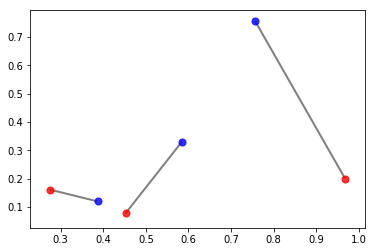

In [37]:
#Brute Force Minimum Check
import itertools as it
import math

f_n = math.factorial(n)

P=np.empty((f_n,n))
    
for i,j in enumerate(it.permutations(range(n))):
    P[i] = j

#print(P)

min_cost = 100

for item in P:
    perm_cost = 0
    for j in range(n):
        perm_cost += D[j][ int(item[j]) ]
    
    if perm_cost < min_cost:
        min_cost = perm_cost
        min_cost_config = item

min_config = np.zeros((n,n), dtype=bool)

for i in range(n):
    min_config[i][ int(min_cost_config[i]) ]=1
    
print(min_config)
print(min_cost)

min_count_cost = 0
min_frequency_count = 0

for c in range(len(configs)):
    if (cost[c] == min_cost): 
        min_count_cost += 1
        min_frequency_count += freq[c]
        print("Found a valid min cost result at index ", c)

print("The count of min cost in valid results is ", min_count_cost)
print("The frequency of min cost in valid results is ", min_frequency_count)

import networkx as nx
import matplotlib.pyplot as plt

G=nx.empty_graph()

nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n),node_color='r',node_size=50,alpha=0.8)
nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n,2*n),node_color='b',node_size=50,alpha=0.8)

E = []

for i in range(n):
    for j in range(n):
        if min_config[i][j]==1:
            E.append((i,n+j))

nx.draw_networkx_edges(G,pos=np.concatenate((R,B)),edgelist=E,width=2,alpha=0.5,edge_color='k')

plt.show()

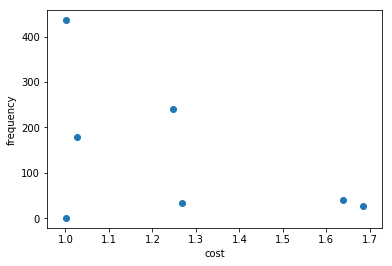

<Figure size 720x720 with 0 Axes>

In [38]:
plt.scatter(cost, freq)
plt.xlabel('cost')
plt.ylabel('frequency')

plt.figure(figsize=(10,10), facecolor='w', edgecolor='w')
plt.show()

for i in range(len(cost)):
    if cost[i]>1.474018 and cost[i]<1.47402:
        print i


Rows and Columns:  3 x 3 





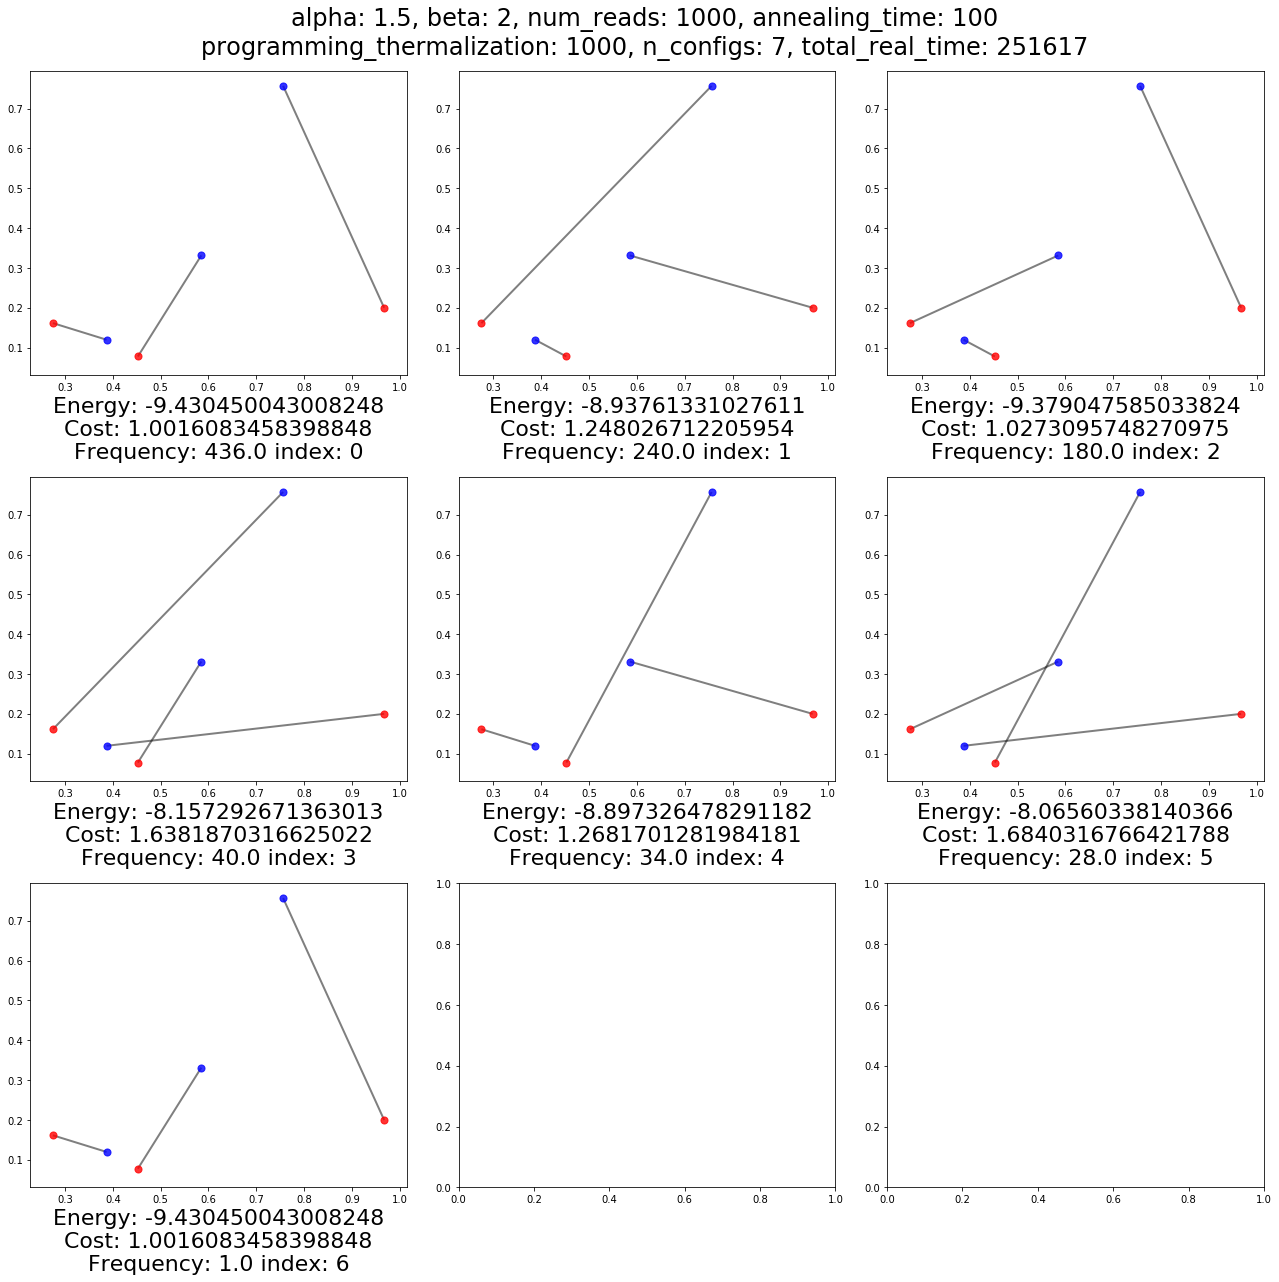

In [39]:
import networkx as nx

n_configs = len(configs)
n_cols = 3
n_rows = int(np.ceil(float(n_configs)/n_cols))

print '\nRows and Columns: ', n_rows, 'x', n_cols, '\n\n\n'
f, axarr = plt.subplots(n_rows, n_cols, figsize=(6*n_cols,6*n_rows), squeeze=False)

f.patch.set_facecolor('white')

for i in range(n_rows):
    for j in range(n_cols):
        k = i*n_cols+j
        if k<n_configs:
            axarr[i][j].set_xlabel('Energy: ' + str(energy[k]) + '\nCost: ' + str(cost[k])
                               + '\nFrequency: ' + str(freq[k]) + ' index: ' + str(k), fontsize=22 )
            
        #axarr[i][j].set_aspect(aspect=1, adjustable='box')

G=nx.empty_graph()

for c in range(n_configs):
       
    nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n),node_color='r',node_size=50,alpha=0.8, ax=axarr[c/n_cols,c%n_cols])
    nx.draw_networkx_nodes(G,pos=np.concatenate((R,B)),nodelist=range(n,2*n),node_color='b',node_size=50,alpha=0.8, ax=axarr[c/n_cols,c%n_cols])

    E = []

    for i in range(n):
        for j in range(n):
            if configs[c][i][j]==1:
                E.append((i,n+j))

    nx.draw_networkx_edges(G,pos=np.concatenate((R,B)),edgelist=E,width=2,alpha=0.5,edge_color='k', ax=axarr[c/n_cols,c%n_cols])
    
f.tight_layout(rect=[0, 0.03, 1, 0.978])
plt.suptitle('alpha: '+str(alpha)+', beta: '+str(beta)+', num_reads: '+str(num_reads)+
             ', annealing_time: '+str(annealing_time)+
             '\nprogramming_thermalization: '+str(programming_thermalization)+
             ', n_configs: '+str(n_configs)+', total_real_time: '+str(total_real_time), verticalalignment='baseline', fontsize=24)
plt.show()

In [44]:
np.savez('outputs/'+str(n)+'_dwave_old', R=R, B=B, alpha=alpha, beta=beta, num_reads=num_reads,
         annealing_time=annealing_time, programming_thermalization=programming_thermalization,
        configs=configs, energy=energy, freq=freq, timing=timing)